<a href="https://colab.research.google.com/github/sachsac/Predictions_of_Sales/blob/main/Project_1_Part_5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Cleaning Steps

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Coding Dojo/data set/sales_predictions.csv'
sales_predictions = pd.read_csv(filename)
sales_predictions.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [62]:
#every grocery store is "small", Supermarkets can be anything. probably OK to delete this column as well
sales_predictions.drop(columns = ['Outlet_Size', 'Item_Weight'], inplace = True)
sales_predictions
sales_predictions.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [63]:
#Let's simplify, supermarket vs grocery
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type2', 'Outlet_Type'] = 'Supermarket'
sales_predictions.loc[sales_predictions['Outlet_Type'] == 'Supermarket Type3', 'Outlet_Type'] = 'Supermarket'
sales_predictions.value_counts('Outlet_Type')

Outlet_Type
Supermarket      7440
Grocery Store    1083
dtype: int64

In [64]:
#combining unique values into Lowfat vs Regular
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'LF', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'reg', 'Item_Fat_Content'] = 'Regular'
sales_predictions.loc[sales_predictions['Item_Fat_Content'] == 'low fat', 'Item_Fat_Content'] = 'Low Fat'
sales_predictions.value_counts('Item_Fat_Content')

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [65]:
grocery_store = sales_predictions[sales_predictions['Outlet_Type'] == 'Grocery Store']
supermarkets = sales_predictions[sales_predictions['Outlet_Type'] != 'Grocery Store']

ML

In [66]:
sales_predictions.dtypes

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [67]:
sales_df = pd.get_dummies(sales_predictions, columns = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type'], drop_first=True)
sales_df.head()

,Item_Identifier,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket
0,FDA15,0.016047,249.8092,OUT049,1999,3735.1380,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,DRC01,0.019278,48.2692,OUT018,2009,443.4228,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,FDN15,0.016760,141.6180,OUT049,1999,2097.2700,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,FDX07,0.000000,182.0950,OUT010,1998,732.3800,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,NCD19,0.000000,53.8614,OUT013,1987,994.7052,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


In [68]:
y = sales_df['Item_Outlet_Sales']
X = sales_df.drop(columns= ['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
X.dtypes
#we drop the identifiers because they only help to identify, it is not a factor of items

Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Fat_Content_Regular             uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_Soft Drinks                uint8
Item_Type_Starchy Foods              uint8
Outlet_Location_Type_Tier 2          uint8
Outlet_Location_Type_Tier 3          uint8
Outlet_Type_Supermarket              uint8
dtype: object

In [69]:
#train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [70]:
#fit the model.
from sklearn.linear_model import LinearRegression
sales_model = LinearRegression()
sales_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
from sklearn.metrics import r2_score
#R2 scores
print('Training R^2:', r2_score(y_train, sales_model.predict(X_train)))
print('Testing R^2:', r2_score(y_test, sales_model.predict(X_test)))

Training R^2: 0.5264424685603024
Testing R^2: 0.5183542888366526


The test set results are comparable to the Training though is slightly above 50%

In [72]:
from sklearn.metrics import mean_squared_error
#RMSE
print('RMSE = Root mean squared errors')
print('Training RMSE:', np.sqrt(mean_squared_error(y_train, sales_model.predict(X_train))))
print('Testing RMSE:', np.sqrt(mean_squared_error(y_test, sales_model.predict(X_test))))

RMSE = Root mean squared errors
Training RMSE: 1183.8380538911258
Testing RMSE: 1152.7573803143312


The Test RMSE is comparable (close) to the Training set RMSE.

In [73]:
importance = sales_model.coef_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 #code from https://machinelearningmastery.com/calculate-feature-importance-with-python/ for formatting

Feature: 0, Score: -503.72958
Feature: 1, Score: 15.65804
Feature: 2, Score: -42.31077
Feature: 3, Score: 54.73251
Feature: 4, Score: -22.86181
Feature: 5, Score: 41.85138
Feature: 6, Score: 43.99536
Feature: 7, Score: -118.53441
Feature: 8, Score: 14.73650
Feature: 9, Score: 45.04554
Feature: 10, Score: 26.95566
Feature: 11, Score: 37.75598
Feature: 12, Score: 4.55127
Feature: 13, Score: 15.84658
Feature: 14, Score: -49.89224
Feature: 15, Score: 339.57722
Feature: 16, Score: -14.56773
Feature: 17, Score: -34.78723
Feature: 18, Score: 47.13292
Feature: 19, Score: 316.22302
Feature: 20, Score: 266.57208
Feature: 21, Score: 2306.94865


In [74]:
#what are these? use X.head() 
X.head()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Regular,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket
0,0.016047,249.8092,1999,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019278,48.2692,2009,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
2,0.016760,141.6180,1999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0.000000,182.0950,1998,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,0.000000,53.8614,1987,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1


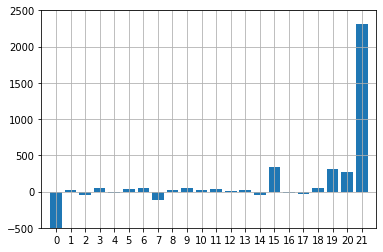

In [76]:
import matplotlib.pyplot as plt
plt.grid()
plt.bar([x for x in range(len(importance))], importance)
plt.xlim(-1, 22)
x=np.random.randint(low=0, high=21, size=21)
plt.xticks(np.arange(0, len(x)+1, 1))
plt.ylim(-500, 2500);
#a plot can help make sense of it

Features 21, 15, 19, 20 are the most affective:
Outlet_Type_Supermarket, Outlet_Location_Type_Tier 3, Outlet_Location_Type_Tier 2 (so Tier types in general), and Item_Type_Seafood. Outlet type (grocery vs supermarket) being by far the most associated.